In [877]:
from matplotlib import rcParams
import keras as keras
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn import datasets
from  sklearn.model_selection import train_test_split
rcParams["figure.figsize"] = 10, 5
%matplotlib inline

In [878]:
cancer = datasets.load_breast_cancer()

x = cancer.data
y = cancer.target


In [879]:
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size)

In [880]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # Normalize the range of the values

sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

print("Unique label: {0}".format(np.unique(y)))

Unique label: [0 1]


In [881]:

n_iter = 1000
eta0 = 0.1
random_state = 42
l1_ratio = 0.5
tol = 1e-3

ppn = Perceptron(max_iter=n_iter, eta0=eta0, random_state=random_state, penalty='elasticnet', l1_ratio=l1_ratio, tol=tol)
lrr = LogisticRegression(max_iter=n_iter, random_state=random_state, solver='saga', penalty='elasticnet', l1_ratio=l1_ratio, tol=tol)

lrr.fit(x_train_std, y_train)
ppn.fit(x_train_std,y_train)

y_pred = ppn.predict(x_test_std)
y_pred_lrr = lrr.predict(x_test_std)
print("accuracy perceptron: {0:.2f}%".format(accuracy_score(y_test,y_pred) * 100))
print("accuracy logistic regression: {0:.2f}%".format(accuracy_score(y_test,y_pred_lrr) * 100))

accuracy perceptron: 95.91%
accuracy logistic regression: 97.08%


C:\Users\passo\PycharmProjects\ANN1\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\passo\PycharmProjects\ANN1\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


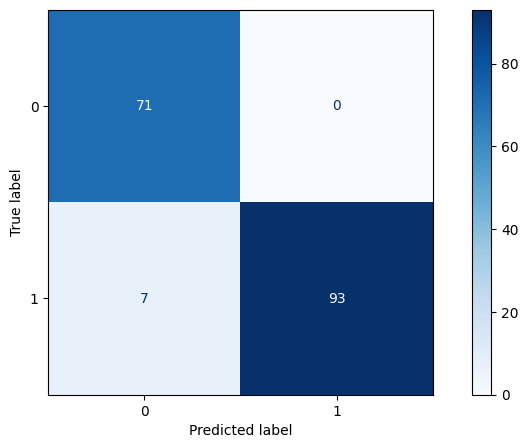

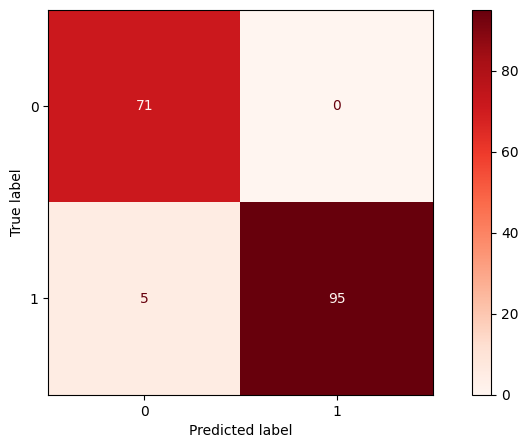

In [882]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_ppn = confusion_matrix(y_test, y_pred)
cm_lrr = confusion_matrix(y_test, y_pred_lrr)

plot_confusion_matrix(ppn, X=x_test_std, y_true=y_test,cmap='Blues')
plot_confusion_matrix(lrr, X=x_test_std, y_true=y_test,cmap='Reds')

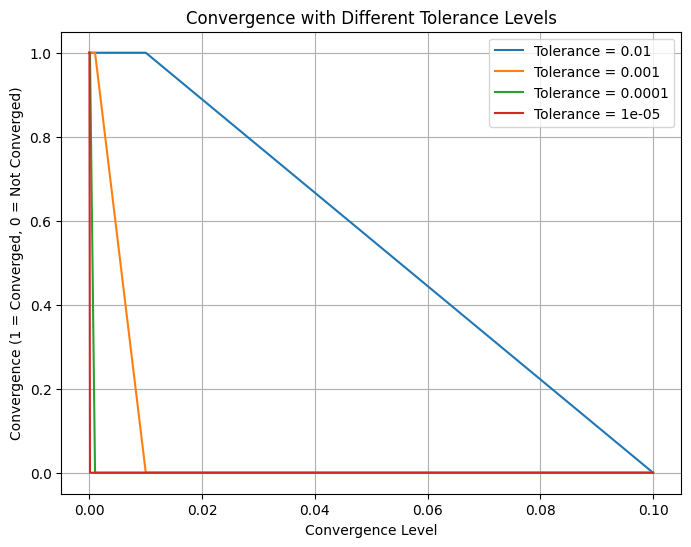

In [2]:
import matplotlib.pyplot as plt

# Tolerance values
tolerance_values = [0.01, 0.001, 0.0001, 0.00001]

# Iteration numbers
iterations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Convergence levels
convergence_levels = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Plotting the graph
plt.figure(figsize=(8, 6))

for tolerance in tolerance_values:
    convergence = [1 if i <= tolerance else 0 for i in convergence_levels]
    plt.plot(convergence_levels, convergence, label=f'Tolerance = {tolerance}')

plt.xlabel('Convergence Level')
plt.ylabel('Convergence (1 = Converged, 0 = Not Converged)')
plt.title('Convergence with Different Tolerance Levels')
plt.legend()
plt.grid(True)
plt.show()